# Proyecto Primer módulo 

## Programación lineal


Un inversionista quiere invertir $84,000$ dólares en diferentes acciones los cuales son; AAPL, AMZN y MSFT. Cuantas acciones de AAPL, AMZN Y MSFT debería de comprar para maximizar su portafolio si se tiene un máximo capital para invertir de 84,000 dólares. Cabe mencionar que AAPL tiene una tasa del $4\%$, MSFT $3\%$ y AMZN $5\%$. Al final como inversionistas, dejamos como máximo invertir un $20\%$ en AMZN debido a que es la más vólatil de las 3 mencionadas con anterioridad y se invertira el doble en AAPL que en MSFT debido a un análisis técnico y fundamental realizado con anterioridad el cual nos da los indicadores que AAPL crecerá. Una de las restricciones es que se tiene un limite de invertir el 50% del captial por cada empresa. Cuanto debemos invertir en cada empresa para maximizar la utilidad de nuestro portafolio + de 10 acciones llevarlo a más acciones 

In [1]:
import numpy as np 
import scipy.optimize as opt

In [131]:
# Matrices
c = -np.array([.04,.03,.05])

# Restricciones de desigualdad
A = np.array([[0,0,1]])

b = np.array([.20*84000])

# Restricción de igualdad
A_eq = np.array([[1,1,1]]) 
b_eq = 84000

# Límites (bounds)
bounds = (0,84000*.50)

# Resolver
sol_bonos = opt.linprog(c,A,b,A_eq,b_eq,bounds,method='revised simplex')

# Mostrar resultado
sol_bonos

     con: array([0.])
     fun: -3276.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0.])
  status: 0
 success: True
       x: array([42000., 25200., 16800.])

Para la acción de apple se le destinarán 42000 dólares, para Microsoft 25200 dólares y para Amazon 16800 dólares

In [173]:
import pandas as pd


In [196]:
archivo = 'prologis.csv'
data = pd.read_csv(archivo)
data


,Días septiembre,Precio Fibras MTY stock
0,1,11.924
1,2,12.003
2,3,11.934
3,4,11.924
4,5,11.924
5,6,11.924
6,7,11.934
7,8,11.944
8,9,11.973
9,10,11.973


In [197]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [198]:
x = data.iloc[:,0]
y = data.iloc[:,1]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

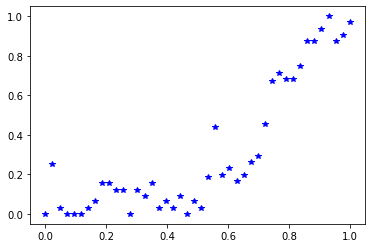

In [199]:
plt.plot(x_norm, y_norm, '*b')

In [200]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [201]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

#Ajusta polinomio de grado 5
b05 = np.zeros(6)
ajuste5 = opt.minimize(fun_obj, b05, args=(x_norm,y_norm,5))

#Ajusta polinomio de grado 6
b06 = np.zeros(7)
ajuste6 = opt.minimize(fun_obj, b06, args=(x_norm,y_norm,6))

#Ajusta polinomio de grado 7
b07 = np.zeros(8)
ajuste7 = opt.minimize(fun_obj, b07, args=(x_norm,y_norm,7))

#Ajusta polinomio de grado 8
b08 = np.zeros(9)
ajuste8 = opt.minimize(fun_obj, b08, args=(x_norm,y_norm,8))

#Ajusta polinomio de grado 9
b09 = np.zeros(10)
ajuste9 = opt.minimize(fun_obj, b09, args=(x_norm,y_norm,9))

In [202]:
ajuste1

      fun: 1.3004990597312813
 hess_inv: array([[ 0.24234713, -0.42701716],
       [-0.42701716,  0.79029112]])
      jac: array([6.25848770e-07, 1.34110451e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.16638857,  0.96827771])

In [203]:
ajuste2

      fun: 0.44479757835030576
 hess_inv: array([[ 0.0935112 , -0.36966403,  0.30451251],
       [-0.36966403,  2.00087989, -1.87057686],
       [ 0.30451251, -1.87057686,  1.87057686]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.1248799 , -0.82094295,  1.78922068])

In [204]:
ajuste3

      fun: 0.44457899482649105
 hess_inv: array([[  0.15204961,  -1.11780308,   2.19971226,  -1.2647823 ],
       [ -1.11780308,  11.55909738, -26.07952438,  16.15441631],
       [  2.19971226, -26.07952438,  63.18151099, -40.91009489],
       [ -1.2647823 ,  16.15441631, -40.91009489,  27.2966261 ]])
      jac: array([ 8.94069672e-08, -4.02331352e-07,  4.95463610e-07, -1.15483999e-07])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([ 0.11973707, -0.75543393,  1.62354885,  0.11044902])

In [205]:
ajuste4

      fun: 0.3300673642921815
 hess_inv: array([[ 2.08691388e-01, -2.51272043e+00,  8.84848336e+00,
        -1.18254794e+01,  5.31565449e+00],
       [-2.51272043e+00,  4.34034082e+01, -1.74610772e+02,
         2.50092513e+02, -1.17324902e+02],
       [ 8.84848336e+00, -1.74610772e+02,  7.51001316e+02,
        -1.12075684e+03,  5.40681355e+02],
       [-1.18254794e+01,  2.50092513e+02, -1.12075684e+03,
         1.71985885e+03, -8.46672335e+02],
       [ 5.31565449e+00, -1.17324902e+02,  5.40681355e+02,
        -8.46672335e+02,  4.23274134e+02]])
      jac: array([-7.41332769e-07,  2.04518437e-06,  7.89761543e-07, -8.23289156e-07,
       -1.89989805e-06])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 27
     njev: 30
   status: 0
  success: True
        x: array([-2.14721638e-03,  1.96397422e+00, -1.09439824e+01,  1.98066875e+01,
       -9.84811409e+00])

In [206]:
ajuste5

      fun: 0.2824941760385455
 hess_inv: array([[ 2.68789928e-01, -4.75361543e+00,  2.55404044e+01,
        -5.75160620e+01,  5.73269856e+01, -2.08990266e+01],
       [-4.75361543e+00,  1.25021859e+02, -7.76590034e+02,
         1.88890406e+03, -1.97660698e+03,  7.45460824e+02],
       [ 2.55404044e+01, -7.76590034e+02,  5.17332581e+03,
        -1.31322305e+04,  1.41469291e+04, -5.44911534e+03],
       [-5.75160620e+01,  1.88890406e+03, -1.31322305e+04,
         3.42959517e+04, -3.77074459e+04,  1.47494161e+04],
       [ 5.73269856e+01, -1.97660698e+03,  1.41469291e+04,
        -3.77074459e+04,  4.20960034e+04, -1.66628558e+04],
       [-2.08990266e+01,  7.45460824e+02, -5.44911534e+03,
         1.47494161e+04, -1.66628558e+04,  6.65857326e+03]])
      jac: array([-1.47894025e-06,  3.95998359e-06,  1.35228038e-06, -4.35858965e-07,
       -1.91852450e-06, -2.92807817e-06])
  message: 'Optimization terminated successfully.'
     nfev: 336
      nit: 45
     njev: 48
   status: 0
  success

In [207]:
ajuste6

      fun: 0.27782683371153183
 hess_inv: array([[ 3.21591549e-01, -7.20741696e+00,  5.18486521e+01,
        -1.67831578e+02,  2.70895373e+02, -2.13039866e+02,
         6.50431172e+01],
       [-7.20741696e+00,  2.56763978e+02, -2.20769179e+03,
         7.87645530e+03, -1.35237101e+04,  1.10972703e+04,
        -3.49352520e+03],
       [ 5.18486521e+01, -2.20769179e+03,  2.06936620e+04,
        -7.78710502e+04,  1.38653073e+05, -1.16811946e+05,
         3.75124535e+04],
       [-1.67831578e+02,  7.87645530e+03, -7.78710502e+04,
         3.03646971e+05, -5.54659307e+05,  4.76360868e+05,
        -1.55281526e+05],
       [ 2.70895373e+02, -1.35237101e+04,  1.38653073e+05,
        -5.54659307e+05,  1.03267654e+06, -9.00078364e+05,
         2.96864451e+05],
       [-2.13039866e+02,  1.10972703e+04, -1.16811946e+05,
         4.76360868e+05, -9.00078364e+05,  7.93714713e+05,
        -2.64269697e+05],
       [ 6.50431172e+01, -3.49352520e+03,  3.75124535e+04,
        -1.55281526e+05,  2.9686445

In [208]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)
yhat5 = ajuste5.x.dot([x_norm**i for i in range(6)])*(max(y)-min(y)) + min(y)
yhat6 = ajuste6.x.dot([x_norm**i for i in range(7)])*(max(y)-min(y)) + min(y)

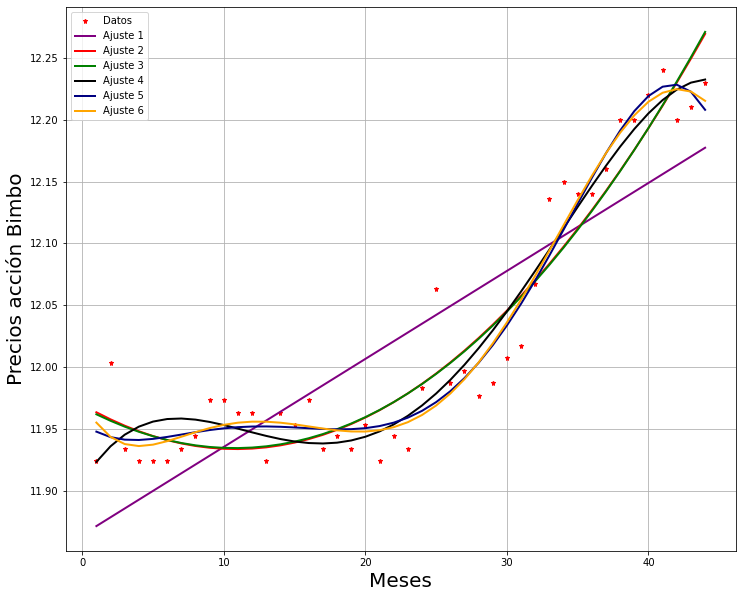

In [209]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'r*', ms=5, label='Datos')
plt.plot(x, yhat1, color = "purple", lw=2, label='Ajuste 1')
plt.plot(x, yhat2, color = "red", lw=2, label='Ajuste 2')
plt.plot(x, yhat3, color = "green", lw=2, label='Ajuste 3')
plt.plot(x, yhat4, color = "black", lw=2, label='Ajuste 4')
plt.plot(x, yhat5, color = "navy", lw=2, label='Ajuste 5')
plt.plot(x, yhat6, color = "orange", lw=2, label='Ajuste 6')

plt.xlabel('Meses',fontsize=20)
plt.ylabel('Precios acción Bimbo',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

[]

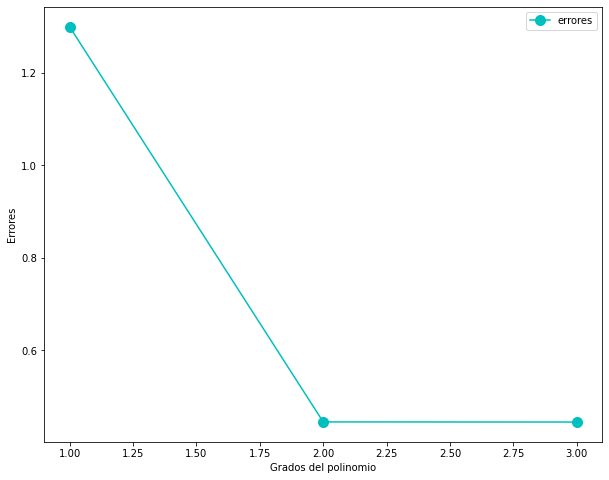

In [217]:
e = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
grados = [1, 2, 3]
plt.figure(figsize=(10,8))
plt.plot(grados, e, 'oc-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.plot()

Utilizaremos el polinomio de grado 5 es el más indicado para hacer predicciones y se aproxima a los puntos de la gráfica 

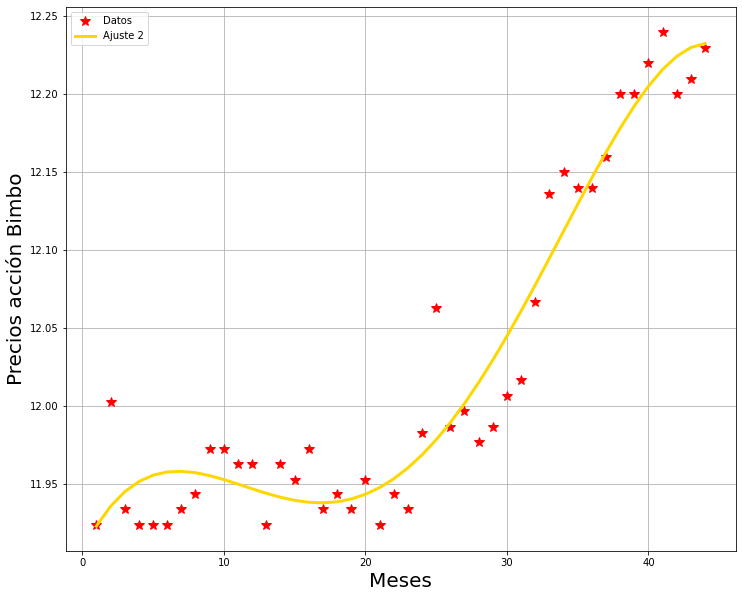

In [218]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'r*', ms=10, label='Datos')

plt.plot(x, yhat4, color = "gold", lw=3, label='Ajuste 2')

plt.xlabel('Meses',fontsize=20)
plt.ylabel('Precios acción Bimbo',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

In [222]:
yhat1[43],yhat2[43],yhat3[43], y[43]



(12.17739696828857, 12.269437810196042, 12.271063120490556, 12.23)

In [223]:
grado1 = yhat1[43]-y[43]
grado1



-0.052603031711431214

In [224]:
grado2 = -yhat2[43]+y[43]
grado2

-0.03943781019604131

In [225]:
grado3 = -yhat3[43]+y[43]
grado3

-0.041063120490555605